### Clustering

In [2]:
"""
Wir werden in dieser Lektion die Daten nach folgenden Spalten clustern:
    * yearOfRegistration
    * price
"""

import pandas as pd

In [3]:
df = pd.read_csv("autos_prepared.csv")
df.head()

,price,yearOfRegistration,powerPS,kilometer,model,fuelType,name
0,1450,1997,75,90000,andere,benzin,Toyota_Toyota_Starlet_1._Hand__TÜV_neu
1,13100,2005,280,5000,golf,benzin,R32_tauschen_oder_kaufen
2,4500,2008,87,90000,yaris,benzin,Toyota_Yaris_1.3_VVT_i
3,6000,2009,177,125000,3er,diesel,320_Alpinweiss_Kohlenstoff
4,3990,1999,118,90000,3er,benzin,BMW_318i_E46_+++_1._Hand_+++_Liebhaberfahrzeug


In [5]:
%matplotlib inline

import matplotlib.pyplot as plt

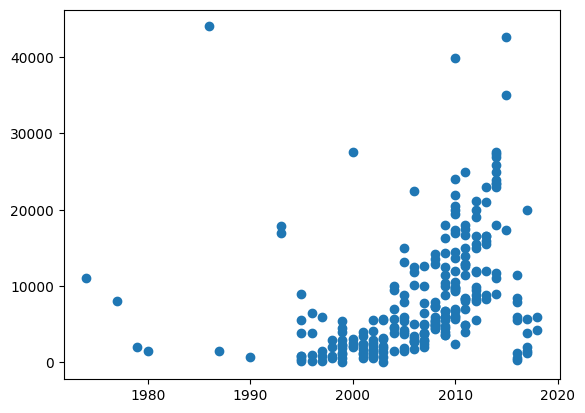

In [7]:
plt.scatter(df["yearOfRegistration"], df["price"])
plt.show()

In [8]:
X = df[["yearOfRegistration", "price"]]

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_transformed = scaler.fit_transform(X)

In [12]:
from sklearn.cluster import KMeans

In [30]:
model = KMeans(n_clusters = 3) # Anzahl der Clustering
model.fit(X_transformed)

labels = model.labels_
centers = model.cluster_centers_
          
print(f"Labels: {set(labels)}\n")
print(f"Centers:\n{centers}\n")

centers_transformed = scaler.inverse_transform(centers)

print(f"Centers transformed:\n{center_transformed}")

Labels: {0, 1, 2}

Centers:
[[ 0.42359257 -0.18232321]
 [ 0.68373571  1.74216888]
 [-1.18386552 -0.71789649]]

Centers transformed:
[[ 1998.38961039  2952.87012987]
 [ 2011.29545455 22170.75      ]
 [ 2009.60465116  7251.64341085]]


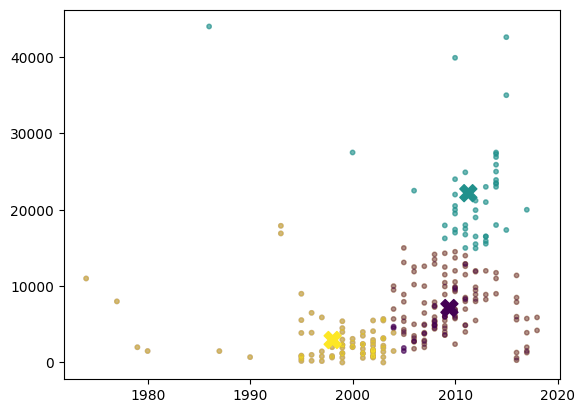

In [31]:
plt.scatter(df["yearOfRegistration"], df["price"], c=labels, alpha=0.4, s=10)
plt.scatter(
    centers_transformed[:, 0], 
    centers_transformed[:, 1], 
    c = range(len(centers_transformed)), 
    marker = "X", 
    s = 150)

plt.show()